In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/lynxdataset/LYNXdata.csv
/kaggle/input/nottingham-temp/nottem.csv


In [6]:
import pandas as pd
lynx = pd.read_csv("../input/lynxdataset/LYNXdata.csv",header=0,index_col=0)
lynx.head()

,trappings
year,
1821,269
1822,321
1823,585
1824,871
1825,1475


In [9]:
import pandas as pd
nottem = pd.read_csv("../input/nottingham-temp/nottem.csv",header=0,index_col=0,names=['index','temp'])
nottem.head()

,temp
index,
1,40.6
2,40.8
3,44.4
4,46.7
5,54.1


In [10]:
lynxseries=pd.Series(lynx['trappings'].values,index=pd.date_range('31/12/1821',periods=114,freq='A-DEC'))
lynxseries

1821-12-31     269
1822-12-31     321
1823-12-31     585
1824-12-31     871
1825-12-31    1475
              ... 
1930-12-31     662
1931-12-31    1000
1932-12-31    1590
1933-12-31    2657
1934-12-31    3396
Freq: A-DEC, Length: 114, dtype: int64

In [13]:
nottemseries=pd.Series(nottem['temp'].values,index=pd.date_range('1920-01-31',periods=240,freq='M'))
nottemseries.head()

1920-01-31    40.6
1920-02-29    40.8
1920-03-31    44.4
1920-04-30    46.7
1920-05-31    54.1
Freq: M, dtype: float64

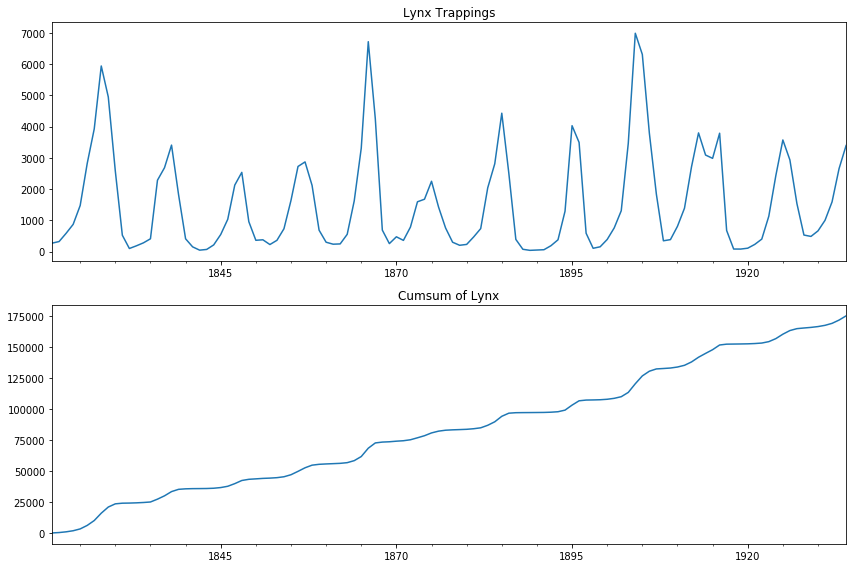

In [16]:
cumsum_lynx=np.cumsum(lynxseries)
fig, (ax1,ax2)=plt.subplots(2,1,figsize=(12,8))
lynxseries.plot(ax=ax1)
cumsum_lynx.plot(ax=ax2)
ax1.set_title('Lynx Trappings')
ax2.set_title('Cumsum of Lynx')
plt.tight_layout()

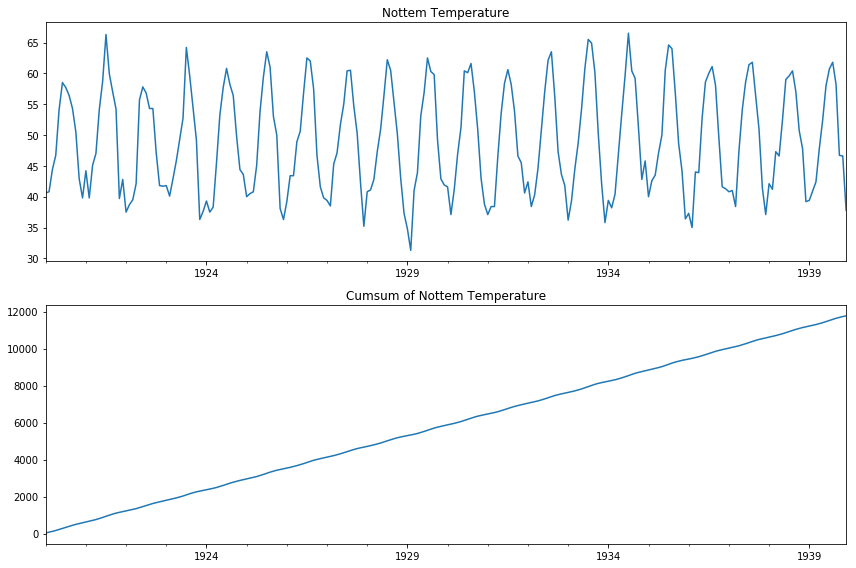

In [18]:
cumsum_nottem=np.cumsum(nottemseries)
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,8))
nottemseries.plot(ax=ax1)
cumsum_nottem.plot(ax=ax2)
ax1.set_title('Nottem Temperature')
ax2.set_title('Cumsum of Nottem Temperature')
plt.tight_layout()

In [19]:
def statistical_testing(timeseries):
    from statsmodels.tsa.stattools import adfuller
    print('Test results are:')
    df_test=adfuller(timeseries,autolag='AIC')
    df_output=pd.Series(df_test[0:4],index=['Test-statistic','p-value','Number of lags','Number of observations used'])
    print(df_output)

In [21]:
statistical_testing(lynxseries)

Test results are:
Test-statistic                  -2.996304
p-value                          0.035241
Number of lags                   7.000000
Number of observations used    106.000000
dtype: float64


In [22]:
statistical_testing(nottemseries)

Test results are:
Test-statistic                  -3.240917
p-value                          0.017735
Number of lags                  14.000000
Number of observations used    225.000000
dtype: float64


In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

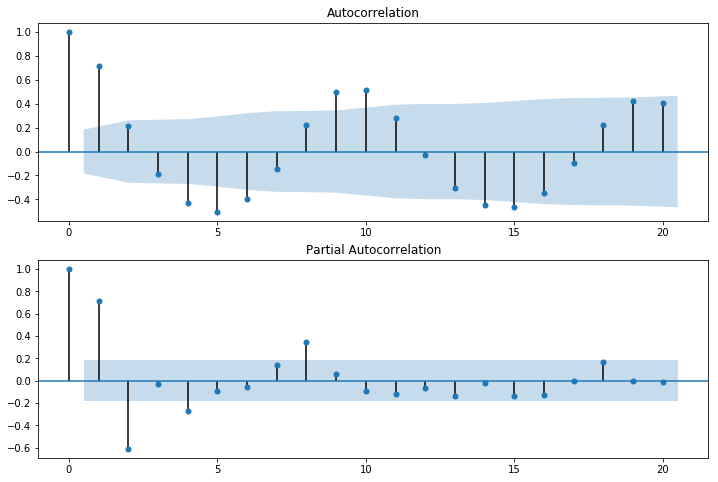

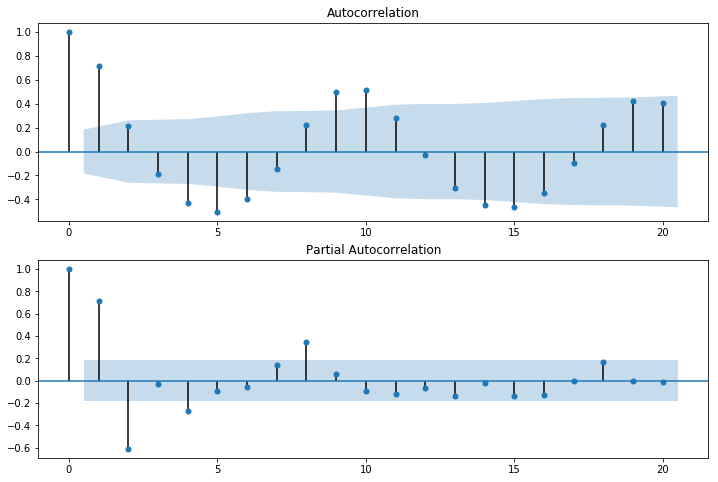

In [26]:
fig, (ax1,ax2)=plt.subplots(2,1,figsize=(12,8))
plot_acf(lynxseries,lags=20,ax=ax1)
plot_pacf(lynxseries,lags=20,ax=ax2)

In [29]:
def plot_rolling(timeseries,window,alpha=None):
    rol_mean=timeseries.rolling(window).mean()
    rol_std=timeseries.rolling(window).std()
    if alpha:
        ema=timeseries.ewm(alpha=alpha).mean()   
        fig=plt.figure(figsize=(12,8))
        orig=plt.plot(timeseries,color='blue',label='Original')
        rmean=plt.plot(rol_mean,color='red',label='Rolling mean')
        rstd=plt.plot(rol_std,color='black',label='Rolling std')
        em=plt.plot(ema,color='yellow',label=' Exp moving average')
        plt.legend(loc='best')
    else:
        fig=plt.figure(figsize=(12,8))
        orig=plt.plot(timeseries,color='blue',label='Original')
        rmean=plt.plot(rol_mean,color='red',label='Rolling mean')
        rstd=plt.plot(rol_std,color='black',label='Rolling std')
        plt.legend(loc='best')
    

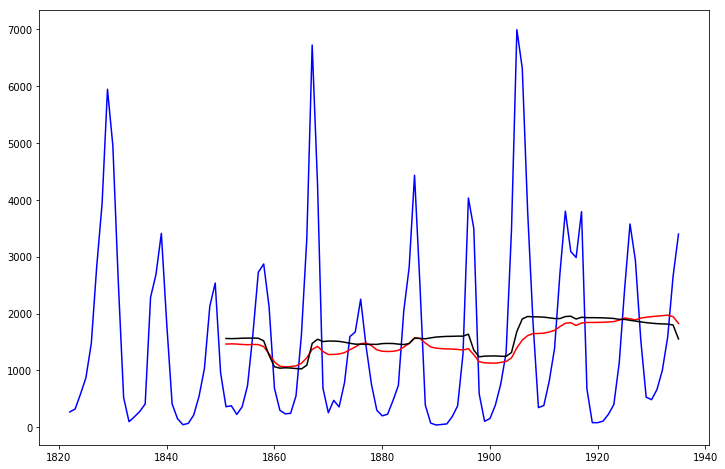

In [32]:
plot_rolling(lynxseries,30)